In [ ]:
# this project used GPA data to decide what data (Features) should be used for modeling.
# Applying methodology found on internet how to choose hyperparamenters to tune Random Forest model
# compare different models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [2]:
df=pd.read_csv("week5.csv")

#df.columns
#renaming the headers just because it has space blanks at the end of the string
new_cols={'Serial No.':'Serial No.', 'GRE Score':'GRE', 'TOEFL Score':'TOEFL', 'University Rating':'University Rating', 
          'SOP':'SOP',
       'LOR':'LOR', 'CGPA':'CGPA', 'Research':'Research', 'Chance of Admit ':'Chance of Admit'}
df.rename(columns=new_cols, inplace=True)

#dropping the column "Serial No." because it is of no use to us
df=df.drop('Serial No.', axis=1) 
#or use the below syntax to drop a column
#df=df.drop(columns='Serial No.')

df.head()


,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


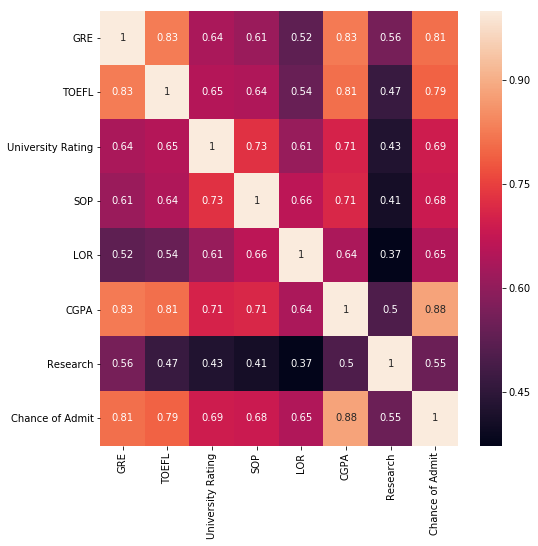

In [3]:
corr_values=df.corr() # calculating the correlation

#plotting heatmap with correlation values on figure size of the plot of 8 by 8 grid
plt.subplots(figsize=(8, 8))
sns.heatmap(corr_values, annot=True)

#except research, almost every feature has a high correlation

'\nShould I consider research??\n'

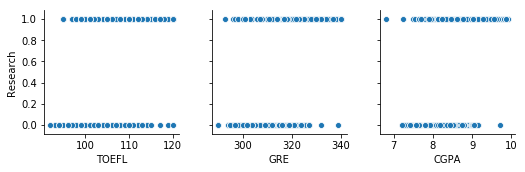

In [4]:
#sns.pairplot(df, x_vars=["TOEFL","GRE", "CGPA"], y_vars=["Chance of Admit"], hue='University Rating')
#sns.pairplot(df, x_vars=["LOR", "Research", "University Rating"], y_vars=["Chance of Admit"])
"""
Research: has almost no direct impact on chances of admit
LOR: high score of LOR means that greater chance of admit, yet low scores doesn't guarantee bad chances of admit

"""
sns.pairplot(df, x_vars=["TOEFL","GRE", "CGPA"], y_vars=["Research"])
#no significant impact of research on test scores, however, research experience somewhat
# guarantees that student will have better and higher score in Tests
# correlation values demonstrated the same
"""
Should I consider research??
"""

In [5]:
df.columns

Index(['GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance of Admit'],
      dtype='object')

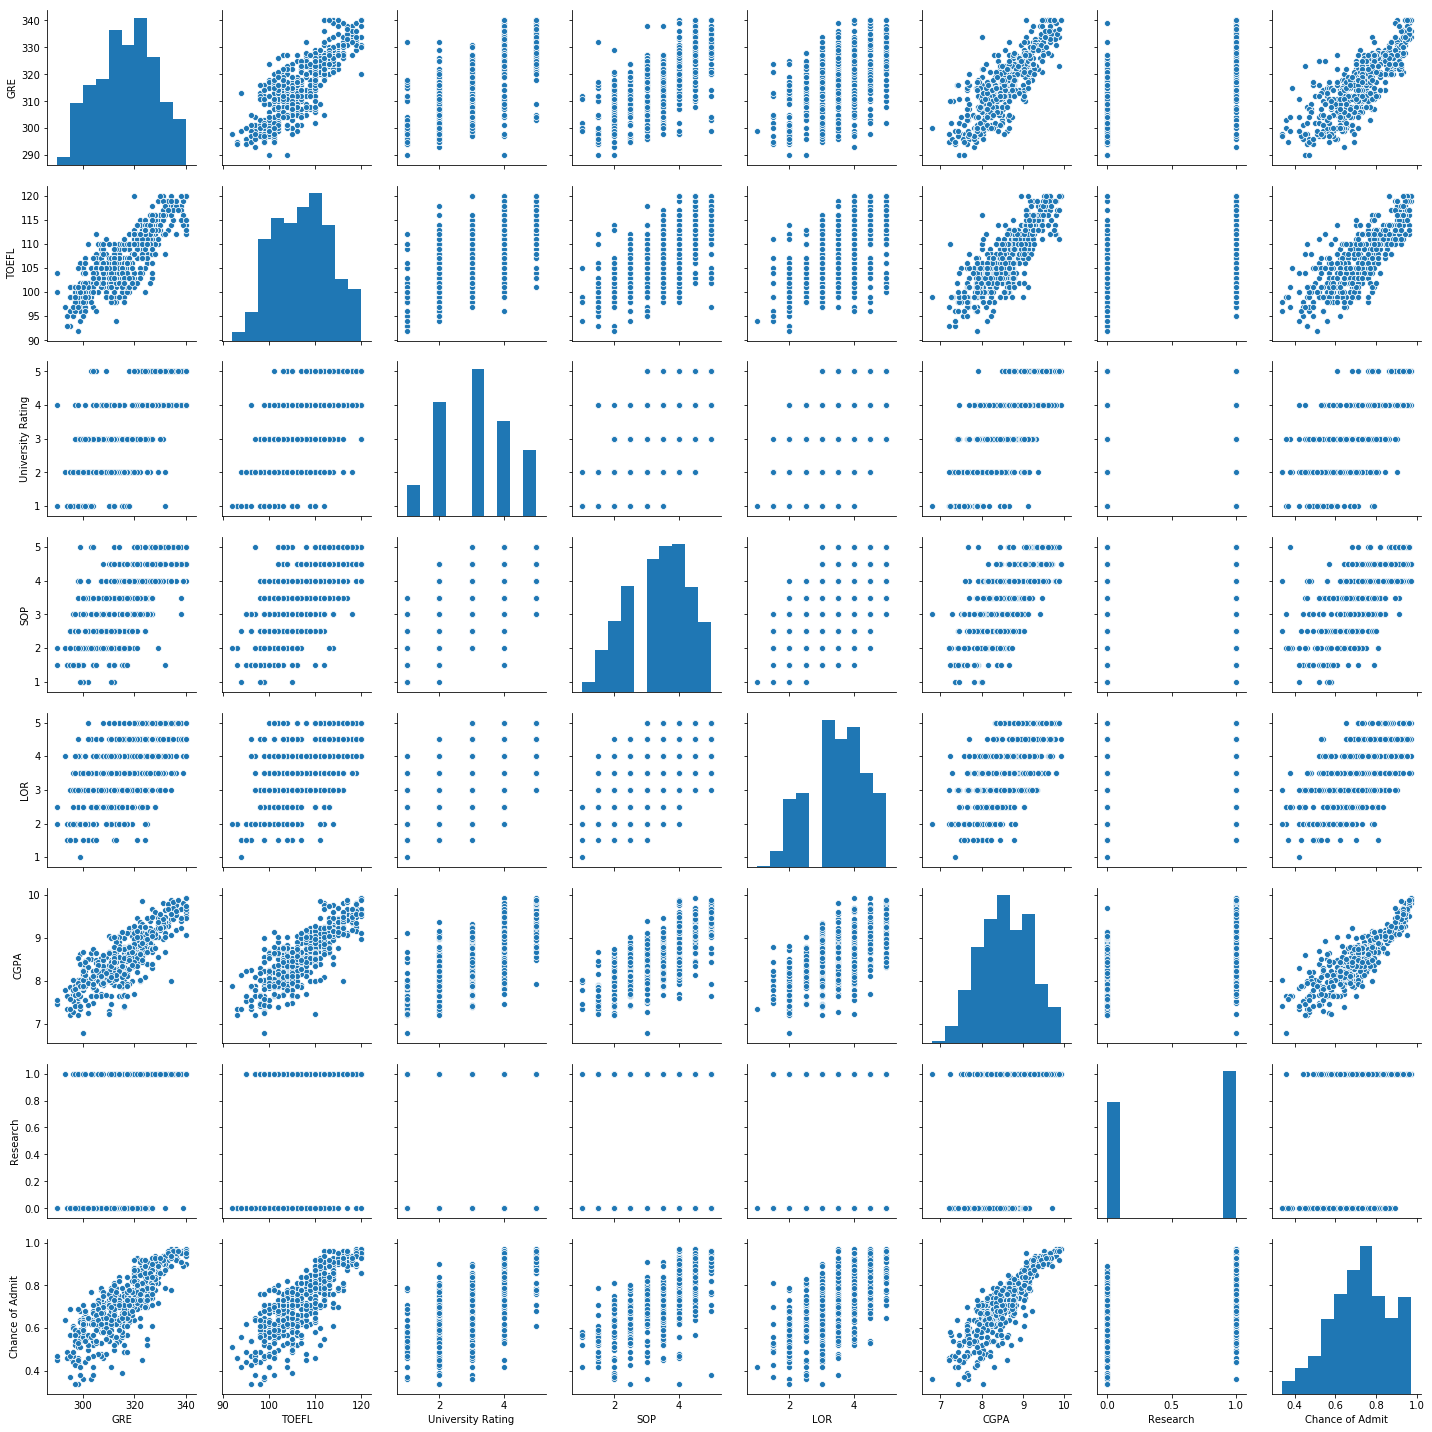

In [6]:
#complete scatterplot
sns.pairplot(df[['GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance of Admit']])

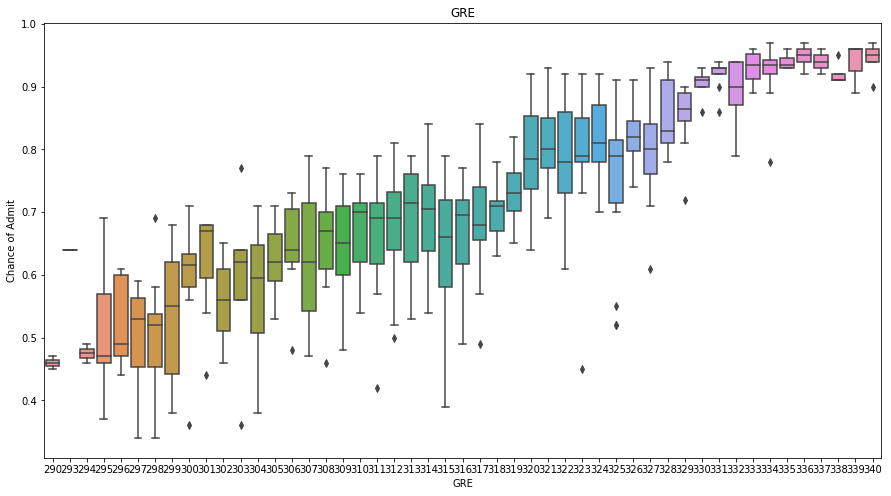

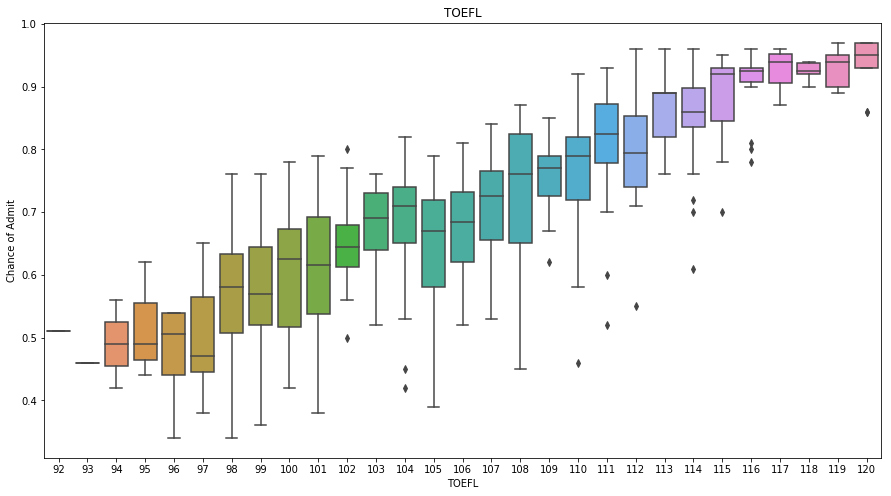

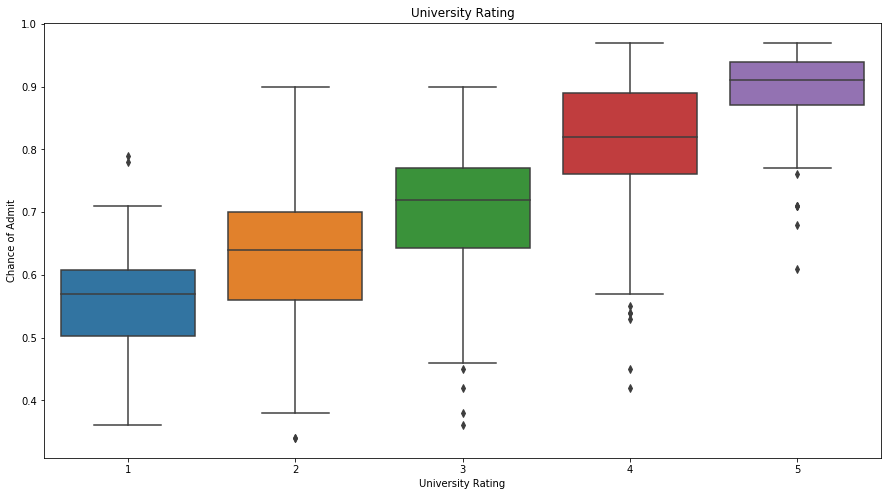

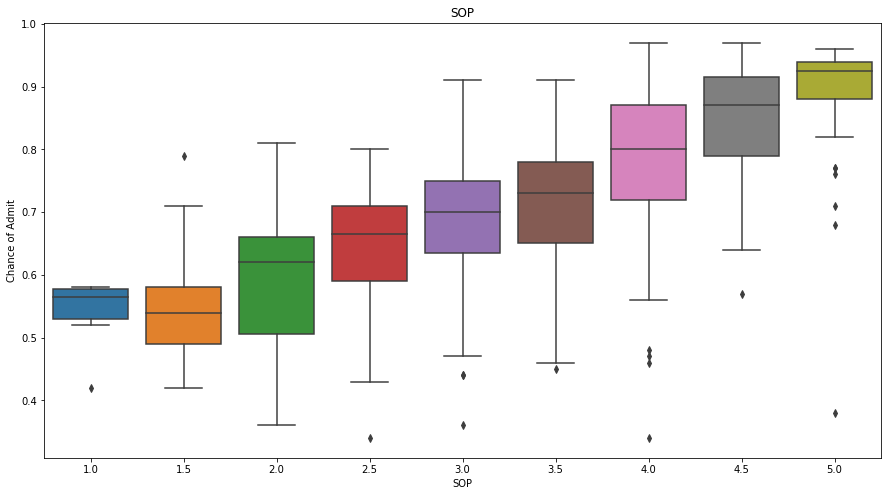

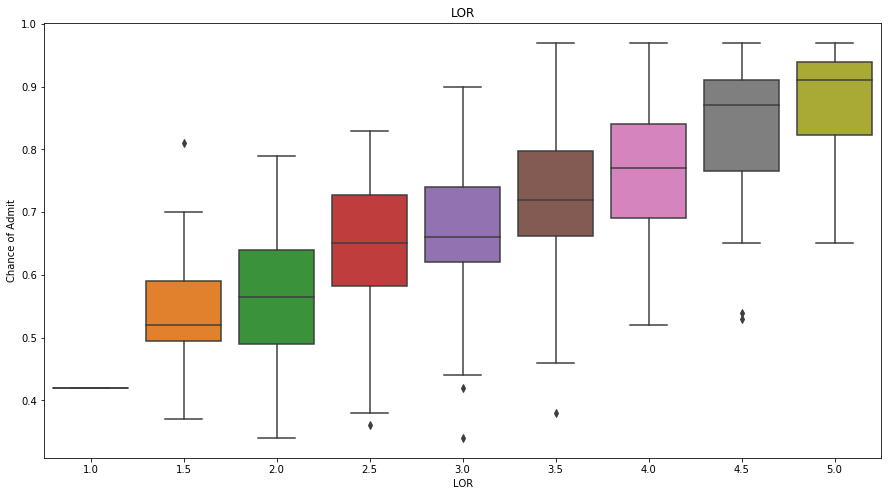

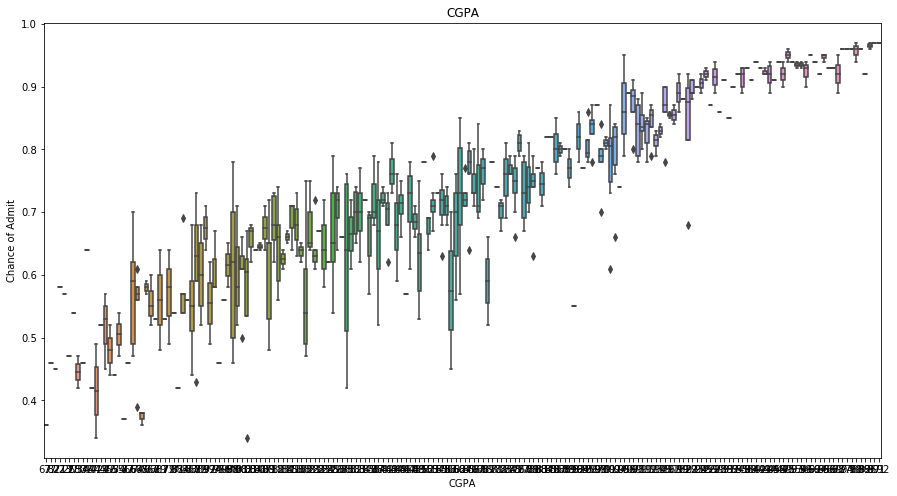

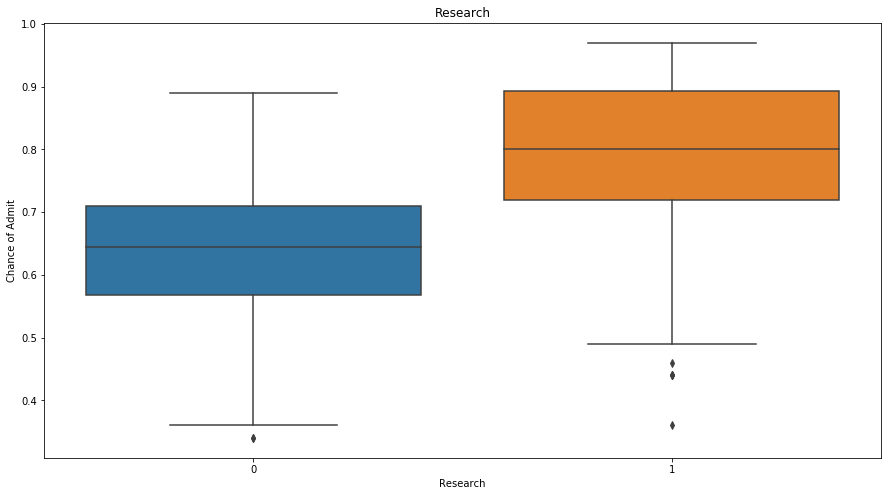

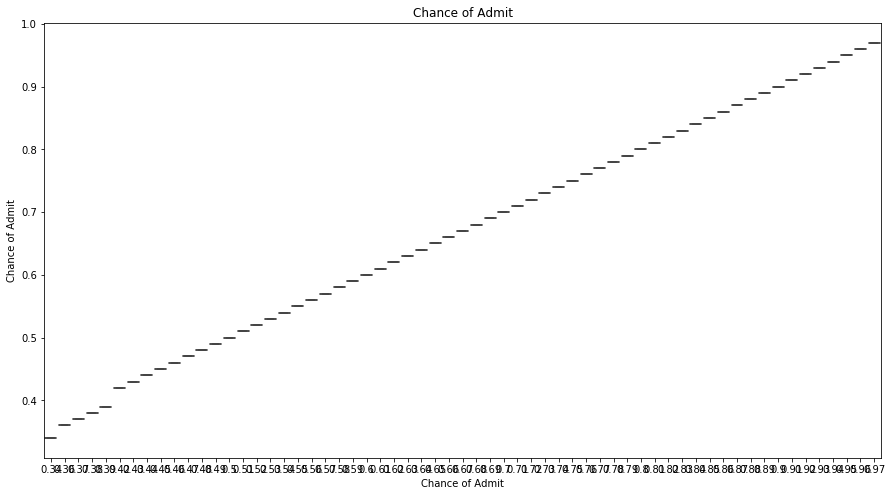

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
#visualizing the distribution of the data
#only look for categorical data
for i in range(0,8):
    plt.subplots(figsize=(15, 8))
    plt.title(df.columns[i])
    sns.boxplot(x=df[df.columns[i]], y=df["Chance of Admit"])
    plt.show()
    
df.describe()


In [8]:
df.skew()
"""
SOP                 -0.228972
LOR                 -0.145290
Research            -0.242475
Chance of Admit     -0.289966

*Looks like our target has bias too. Looks like the chances has been provided by the student only based 
on their opinion. Weird!
*Negative value of GRE is OK for me, since the academics never take your IQ in account, just your
consistency and most importantly, the GRE exam tests your english proficiency where as academics certainly doesn't!

Might need to take out the above features when training the model, BUT, it also makes sense having all the features
in the model since the chance of admit is also skewed. Just go with the flow!
"""

"\nSOP                 -0.228972\nLOR                 -0.145290\nResearch            -0.242475\nChance of Admit     -0.289966\n\n*Looks like our target has bias too. Looks like the chances has been provided by the student only based \non their opinion. Weird!\n*Negative value of GRE is OK for me, since the academics never take your IQ in account, just your\nconsistency and most importantly, the GRE exam tests your english proficiency where as academics certainly doesn't!\n\nMight need to take out the above features when training the model, BUT, it also makes sense having all the features\nin the model since the chance of admit is also skewed. Just go with the flow!\n"

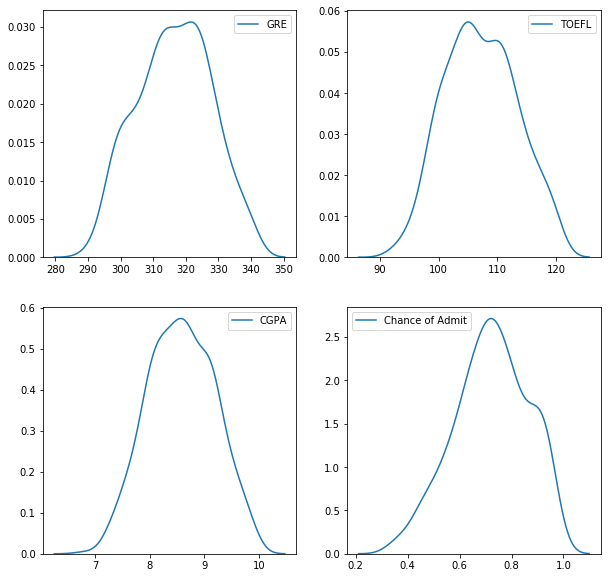

In [9]:
# below code copied from: https://www.kaggle.com/heeyanting/data-analysis-on-graduate-admissions
#already saw the distribution of the data, but doing this to check out this new plot in seaborn

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 10))
sns.kdeplot(
    data = df['GRE'],
    kernel = 'gau',
    ax = ax1
)

sns.kdeplot(
    data = df['TOEFL'],
    kernel = 'gau',
    ax = ax2
)

sns.kdeplot(
    data = df['CGPA'],
    kernel = 'gau',
    ax = ax3
)

sns.kdeplot(
    data = df['Chance of Admit'],
    kernel = 'gau',
    ax = ax4
)

plt.show()

# Regression

In [10]:
#X=df.drop(["Chance of Admit", 'University Rating',"LOR"], axis=1) 
X=df[["GRE", "TOEFL", "CGPA", "Research" ]]
#X=preprocessing.scale(X)

y=df["Chance of Admit"]
#y=preprocessing.normalize([y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

model_all = [LinearRegression(), KNeighborsRegressor(n_neighbors=18), 
             RandomForestRegressor(n_estimators=500, random_state=4),
            DecisionTreeRegressor(random_state=5), SVR()        
            ]
for model in model_all:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(r2_score(y_test, y_pred))
    model=None

0.8227686991053984
0.7507067466080793
0.7676048911123695
0.6324021625921179
0.5199635785550478


/Users/lidag/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)
print(r2_score(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   41.9s finished
/Users/lidag/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7931177851491196


In [13]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
rf_random.best_params_
#rf_random.cv_results_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

# Classification

In [14]:
"""
To make it a classification problem, we need to convert the continous values of target into categorical data.

Reference:
https://www.kaggle.com/utkucanozturk/predict-graduate-admissions-with-python

However, the author of the article claims that "Research" is a predictor, which is definitely not and our results
prove the same.

"""

X=df.drop(["Chance of Admit", "Research"], axis=1) 
#X=preprocessing.scale(X)

y=df["Chance of Admit"]
#y=preprocessing.normalize([y])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
X_train[X_train.columns] = xs.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = xs.transform(X_test[X_test.columns])


y_train=[1 if chance > 0.82 else 0 for chance in y_train]
cy_train=np.array(y_train)
y_test=[1 if chance > 0.82 else 0 for chance in y_test]
cy_test=np.array(y_test)

all_models=[LogisticRegression(), RandomForestClassifier(), SVC()]


for model in all_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    model=None

/Users/lidag/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/lidag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lidag/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/lidag/anaconda3/lib/python3.7/site-packages/ipyk

0.97
0.96
0.98


/Users/lidag/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lidag/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/lidag/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
